## Análise do Desempenho dos Sensores IoT que Monitoram Bombas e Compressores em Plataformas Offshore – Simulação Petrobras

### Contextualização
Nesta análise exploratória, utilizamos dados simulados de sensores IoT instalados em equipamentos críticos — como bombas e compressores — em plataformas offshore de uma empresa do setor de Óleo e Gás. Os dados foram gerados, processados e armazenados em formato Parquet como parte de um pipeline de engenharia de dados.

A análise tem como objetivo avaliar o comportamento e o desempenho desses sensores ao longo do tempo, ajudando a entender padrões operacionais, possíveis falhas e oportunidades de manutenção preventiva.

### Indicadores Monitorados (KPIs):

- Distribuição dos Tipos de Sensores: Identifica quais sensores (temperatura, pressão, vibração) são mais utilizados.

- Tendência Temporal dos Valores: Avalia a variação dos valores registrados por sensores ao longo do tempo.

- Média e Desvio Padrão por Sensor: Analisa estabilidade e variações nas medições de cada tipo de sensor.

- Leituras por Equipamento e Plataforma: Mapeia o volume de dados por unidade monitorada.

- Comparação entre Unidades de Medida: Verifica possíveis inconsistências e padronizações necessárias.

Essa análise permite insights importantes para manutenção preditiva, planejamento operacional e maior confiabilidade das operações offshore.

### Código para carregar e explorar o Parquet

In [9]:
import pandas as pd

# Caminho para o arquivo
caminho_parquet = "../data/lake/sensores_lake.parquet"

# Carregando o DataFrame
df = pd.read_parquet(caminho_parquet)

# Visualizando as primeiras linhas
df.head()


,plataforma,equipamento,tipo_sensor,valor,unidade,timestamp
0,Plataforma A,SensorBox 1,temperatura,97.94,C,2025-03-22 16:35:01.984946+00:00
1,Plataforma A,SensorBox 1,umidade,18.18,%,2025-03-22 16:35:01.984946+00:00
2,Plataforma A,SensorBox 1,pressao,67.23,Pa,2025-03-22 16:35:01.984946+00:00
3,Plataforma B,SensorBox 3,temperatura,18.99,C,2025-03-22 16:35:01.984995+00:00
4,Plataforma B,SensorBox 3,umidade,26.41,%,2025-03-22 16:35:01.984995+00:00


### Distribuição dos Tipos de Sensores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   plataforma   30000 non-null  object 
 1   equipamento  30000 non-null  object 
 2   tipo_sensor  30000 non-null  object 
 3   valor        30000 non-null  float64
 4   unidade      30000 non-null  object 
 5   timestamp    30000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


<Axes: title={'center': 'Temperatura ao longo do tempo'}, xlabel='timestamp'>

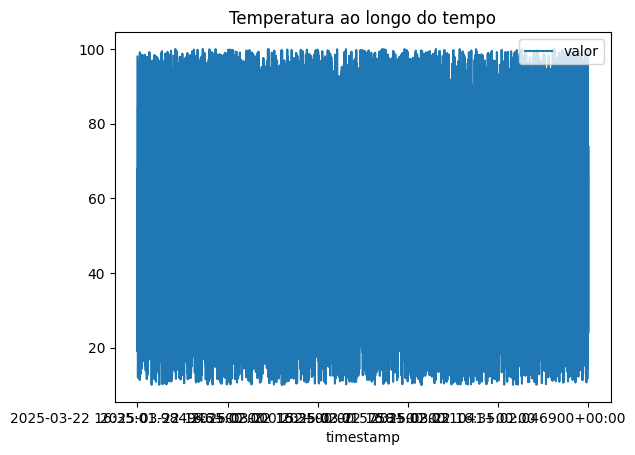

In [10]:
# Ver as colunas e tipos
df.info()

# Estatísticas básicas
df.describe()

# Contagem por tipo de sensor
df['tipo_sensor'].value_counts()

# Evolução do valor de um sensor ao longo do tempo
df[df['tipo_sensor'] == 'temperatura'].sort_values('timestamp').plot(x='timestamp', y='valor', title='Temperatura ao longo do tempo')


### Distribuição de Valores por Tipo de Sensor

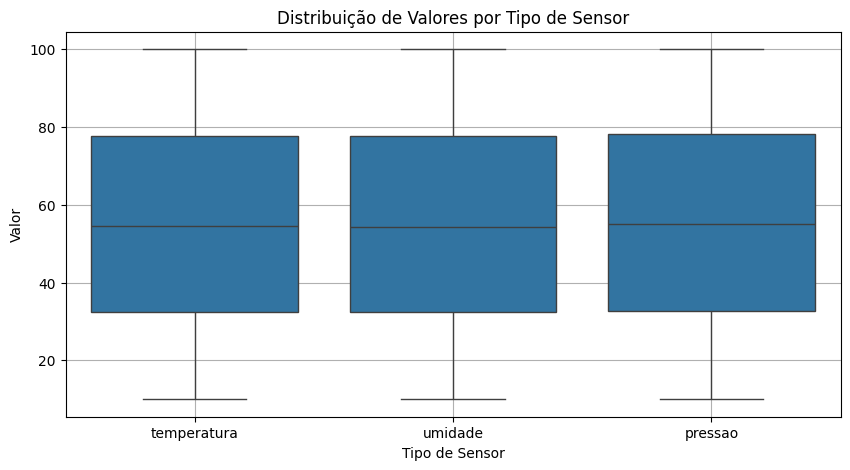

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='tipo_sensor', y='valor')
plt.title('Distribuição de Valores por Tipo de Sensor')
plt.xlabel('Tipo de Sensor')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


### Média de Valores por Equipamento e Tipo de Sensor

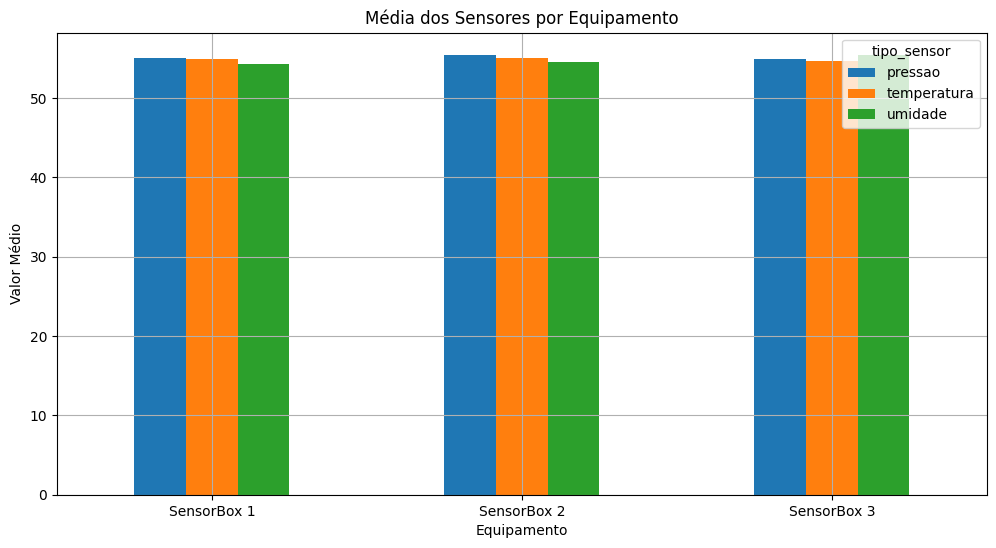

In [12]:
media_equip = df.groupby(['equipamento', 'tipo_sensor'])['valor'].mean().unstack()

media_equip.plot(kind='bar', figsize=(12, 6))
plt.title('Média dos Sensores por Equipamento')
plt.xlabel('Equipamento')
plt.ylabel('Valor Médio')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


### Evolução Temporal para Cada Tipo de Sensor (Linhas Separadas)

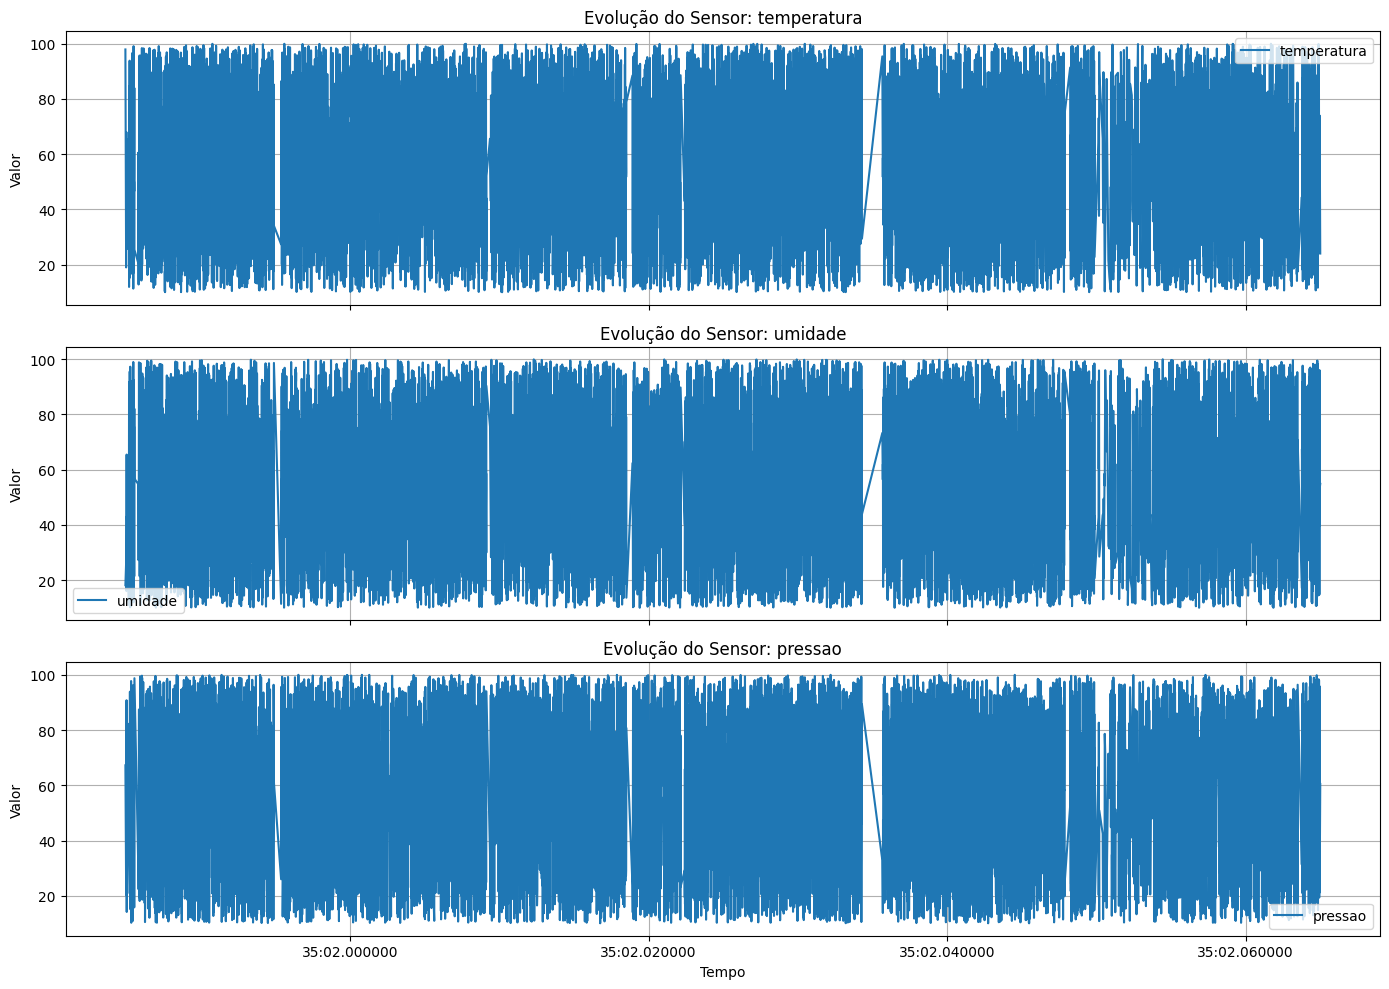

In [13]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])
sensores = df['tipo_sensor'].unique()

fig, axs = plt.subplots(len(sensores), 1, figsize=(14, 10), sharex=True)

for i, sensor in enumerate(sensores):
    dados_sensor = df[df['tipo_sensor'] == sensor]
    axs[i].plot(dados_sensor['timestamp'], dados_sensor['valor'], label=sensor)
    axs[i].set_title(f'Evolução do Sensor: {sensor}')
    axs[i].set_ylabel('Valor')
    axs[i].grid(True)
    axs[i].legend()

plt.xlabel('Tempo')
plt.tight_layout()
plt.show()


### Contagem de Leituras por Plataforma

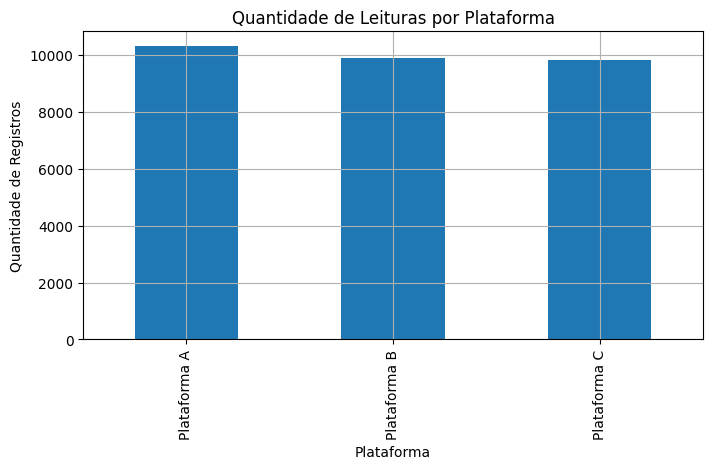

In [14]:
plt.figure(figsize=(8, 4))
df['plataforma'].value_counts().plot(kind='bar')
plt.title('Quantidade de Leituras por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Registros')
plt.grid(True)
plt.show()


### Mapa de Calor da Correlação entre Variáveis dos Sensores

tipo_sensor                        timestamp  pressao  temperatura  umidade
0           2025-03-22 16:35:01.984946+00:00    67.23        97.94    18.18
1           2025-03-22 16:35:01.984995+00:00    23.01        18.99    26.41
2           2025-03-22 16:35:01.985005+00:00    58.58        39.38    23.10
3           2025-03-22 16:35:01.985012+00:00    20.31        68.01    16.07
4           2025-03-22 16:35:01.985021+00:00    90.79        34.31    59.03


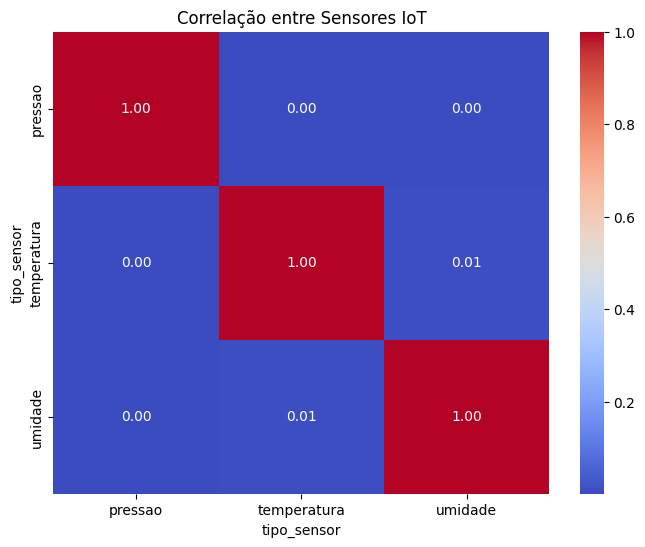

In [15]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho corrigido com base na estrutura real
caminho = Path("../data/lake/sensores_lake.parquet")

if not caminho.exists():
    raise FileNotFoundError(f"Arquivo não encontrado: {caminho.resolve()}")

# Carregar o DataFrame
df = pd.read_parquet(caminho)

# Garantir que o timestamp seja datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Pivotar os dados (colunas para cada tipo de sensor)
df_pivot = df.pivot_table(
    index='timestamp',
    columns='tipo_sensor',
    values='valor'
).reset_index()

# Exibir as primeiras linhas do pivot
print(df_pivot.head())

# Criar o mapa de calor da correlação entre os sensores
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Sensores IoT')
plt.show()
